In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("pokemon_cleaned.csv")
df.head().T

,0,1,2,3,4
name,Bulbasaur,Ivysaur,Venusaur,Charmander,Charmeleon
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']"
against_bug,1.0,1.0,1.0,0.5,0.5
against_dark,1.0,1.0,1.0,1.0,1.0
against_dragon,1.0,1.0,1.0,1.0,1.0
against_electric,0.5,0.5,0.5,1.0,1.0
against_fairy,0.5,0.5,0.5,0.5,0.5
against_fight,0.5,0.5,0.5,1.0,1.0
against_fire,2.0,2.0,2.0,0.5,0.5
against_flying,2.0,2.0,2.0,1.0,1.0


In [3]:
df["type2"].fillna("None", inplace = True)
df["percentage_male"].fillna("None", inplace = True)

C:\Users\seitz\AppData\Local\Temp\ipykernel_26992\3637152946.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["type2"].fillna("None", inplace = True)
C:\Users\seitz\AppData\Local\Temp\ipykernel_26992\3637152946.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [4]:
df.head().T

,0,1,2,3,4
name,Bulbasaur,Ivysaur,Venusaur,Charmander,Charmeleon
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']"
against_bug,1.0,1.0,1.0,0.5,0.5
against_dark,1.0,1.0,1.0,1.0,1.0
against_dragon,1.0,1.0,1.0,1.0,1.0
against_electric,0.5,0.5,0.5,1.0,1.0
against_fairy,0.5,0.5,0.5,0.5,0.5
against_fight,0.5,0.5,0.5,1.0,1.0
against_fire,2.0,2.0,2.0,0.5,0.5
against_flying,2.0,2.0,2.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   against_bug        801 non-null    float64
 3   against_dark       801 non-null    float64
 4   against_dragon     801 non-null    float64
 5   against_electric   801 non-null    float64
 6   against_fairy      801 non-null    float64
 7   against_fight      801 non-null    float64
 8   against_fire       801 non-null    float64
 9   against_flying     801 non-null    float64
 10  against_ghost      801 non-null    float64
 11  against_grass      801 non-null    float64
 12  against_ground     801 non-null    float64
 13  against_ice        801 non-null    float64
 14  against_normal     801 non-null    float64
 15  against_poison     801 non-null    float64
 16  against_psychic    801 non

In [6]:
# Compare Classifiers

X = df[["attack", "base_total", "capture_rate", "defense", "experience_growth", "hp", "sp_attack", 
          "sp_defense", "speed", "weight_kg", "generation"]].values # Features considered in our model
y = df["is_legendary"].values # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Fit scaler object to training data
scaler = StandardScaler() 
scaler.fit(X_train)

# Scale training and test data on the same scale / benchmark
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

0.945273631840796
GaussianNB Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       173
           1       0.87      0.71      0.78        28

    accuracy                           0.95       201
   macro avg       0.91      0.85      0.88       201
weighted avg       0.94      0.95      0.94       201

The accuracy score the model achieved is: 94.53 %


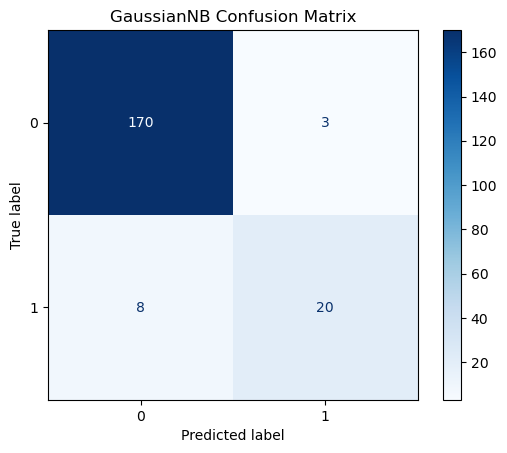

In [49]:
# Gaussian NB

# Initialize model and fit training data
Gnb = GaussianNB()
Gnb.fit(X_train, y_train)

# Variable for prediction (actual prediction happens here)
y_pred_Gnb = Gnb.predict(X_test)

score_plain = accuracy_score(y_pred_Gnb, y_test)
score_Gnb = round(accuracy_score(y_pred_Gnb, y_test) * 100, 2)

print(score_plain) # plain score

# Evaluate the model
print("GaussianNB Classification Report:")
print(classification_report(y_pred_Gnb, y_test))
print("The accuracy score the model achieved is: " + str(score_Gnb) + " %")

# Visualization with confusion matrix
cm_gnb = confusion_matrix(y_pred_Gnb, y_test, labels = Gnb.classes_)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix = cm_gnb, display_labels = Gnb.classes_)
disp_gnb.plot(cmap = plt.cm.Blues)
plt.title("GaussianNB Confusion Matrix")
plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       178
           1       0.83      0.83      0.83        23

    accuracy                           0.96       201
   macro avg       0.90      0.90      0.90       201
weighted avg       0.96      0.96      0.96       201

The accuracy score the model achieved is: 96.02 %


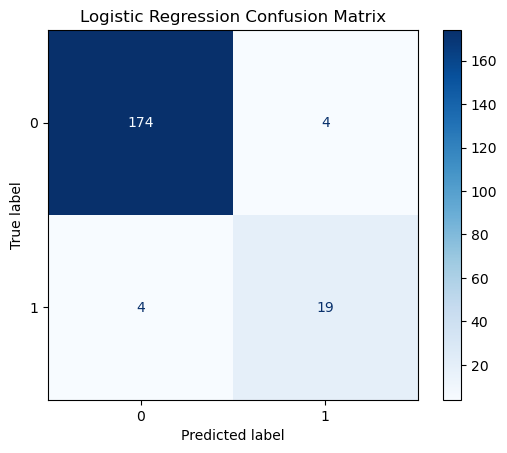

In [50]:
# Logistic Regression

# Initialize model and fit training data
log = LogisticRegression()
log.fit(X_train_scaled, y_train)

# Variable for prediction (actual prediction happens here)
y_pred_log = log.predict(X_test_scaled)

score_log = round(accuracy_score(y_pred_log, y_test) * 100, 2)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_pred_log, y_test))
print("The accuracy score the model achieved is: " + str(score_log) + " %")

# Visualization with confusion matrix
cm_log = confusion_matrix(y_pred_log, y_test, labels = log.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix = cm_log, display_labels = log.classes_)
disp_log.plot(cmap = plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

kNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       182
           1       0.74      0.89      0.81        19

    accuracy                           0.96       201
   macro avg       0.86      0.93      0.89       201
weighted avg       0.97      0.96      0.96       201

The accuracy score the model achieved for n_neighbors = 1 is: 96.02 %


kNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       183
           1       0.74      0.94      0.83        18

    accuracy                           0.97       201
   macro avg       0.87      0.96      0.90       201
weighted avg       0.97      0.97      0.97       201

The accuracy score the model achieved for n_neighbors = 3 is: 96.52 %


kNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       184
           1

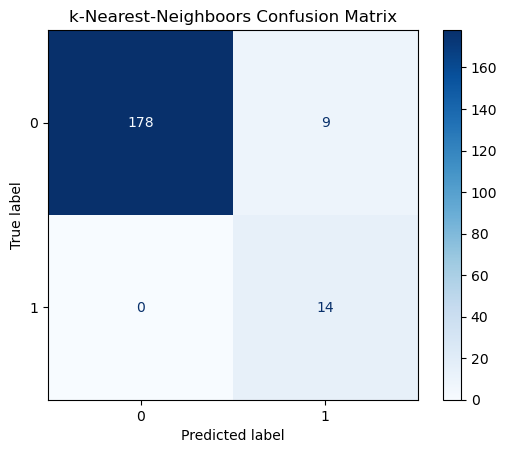

-------------------
Summary of results:
n_neighbors = 1: accuracy = 96.02 %
n_neighbors = 3: accuracy = 96.52 %
n_neighbors = 5: accuracy = 96.02 %
n_neighbors = 10: accuracy = 96.02 %
n_neighbors = 20: accuracy = 95.52 %


In [51]:
# KNN

# Initialize n parameters
n_values = [1, 3, 5, 10, 20]

results = []

# Initialize model and fit training data
for n in n_values:
    
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train_scaled, y_train)

    # Variable for prediction (actual prediction happens here)
    y_pred_knn = knn.predict(X_test_scaled)

    score_knn = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
    
    results.append((n, score_knn))
    
    # Evaluate the model
    print("kNN Classification Report:")
    print(classification_report(y_pred_knn, y_test))
    print(f"The accuracy score the model achieved for n_neighbors = {n} is: " + str(score_knn) + " %")
    print("")
    print("")


# Visualization with confusion matrix
cm_knn = confusion_matrix(y_pred_knn, y_test, labels = knn.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix = cm_knn, display_labels = knn.classes_)
disp_knn.plot(cmap = plt.cm.Blues)
plt.title("k-Nearest-Neighboors Confusion Matrix")
plt.show()
    
    
print("-------------------")
print("Summary of results:")
for n, score in results:
    print(f"n_neighbors = {n}: accuracy = {score} %")

In [10]:
# Examine: Why is the accuracy of n = 20 lower?

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       179
           1       0.87      0.91      0.89        22

    accuracy                           0.98       201
   macro avg       0.93      0.95      0.94       201
weighted avg       0.98      0.98      0.98       201

The accuracy score the model achieved is: 97.51%


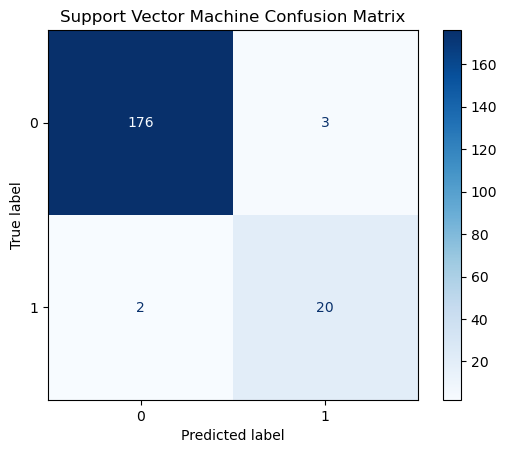

In [52]:
# Support Vector Machines

# Train SVM model
svm = SVC(kernel = "linear", random_state = 42)
svm.fit(X_train_scaled, y_train)

# Make the prediction
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_pred_svm, y_test))
print(f"The accuracy score the model achieved is: " + str(round(accuracy_score(y_pred_svm, y_test) * 100, 2)) + "%")

# Visualization with confusion matrix
cm_svm = confusion_matrix(y_pred_svm, y_test, labels = svm.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = svm.classes_)
disp_svm.plot(cmap = plt.cm.Blues)
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       183
           1       0.78      1.00      0.88        18

    accuracy                           0.98       201
   macro avg       0.89      0.99      0.93       201
weighted avg       0.98      0.98      0.98       201

The accuracy score the model achieved is: 97.51%


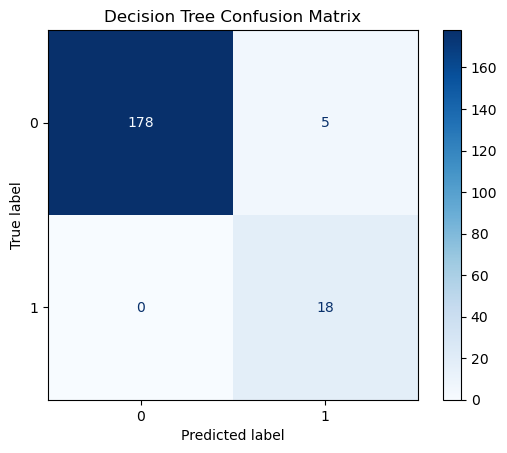

In [56]:
# Decision Trees

# Decision Tree model
tree = DecisionTreeClassifier(max_depth = 3, random_state = 42)
tree.fit(X_train, y_train)

# Perform the prediction
y_pred_tree = tree.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_pred_tree, y_test))
print(f"The accuracy score the model achieved is: " + str(round(accuracy_score(y_pred_tree, y_test) * 100, 2)) + "%")

# Visualization with confusion matrix
cm_tree = confusion_matrix(y_pred_tree, y_test, labels = tree.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix = cm_tree, display_labels = tree.classes_)
disp_tree.plot(cmap = plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       181
           1       0.87      1.00      0.93        20

    accuracy                           0.99       201
   macro avg       0.93      0.99      0.96       201
weighted avg       0.99      0.99      0.99       201

The accuracy score the model achieved is: 98.51%


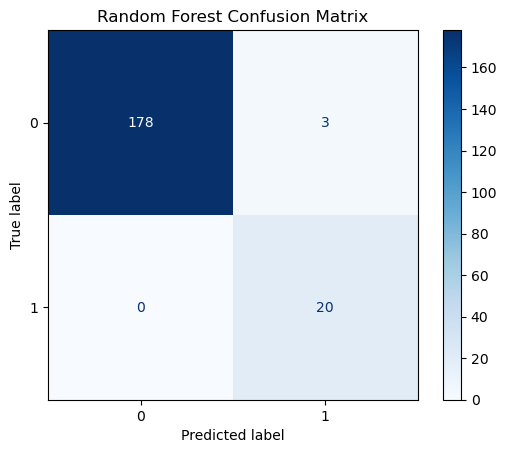

In [59]:
# Random Forest

# Random Forest model
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# Perform the prediction
y_pred_forest = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_pred_forest, y_test))
print(f"The accuracy score the model achieved is: " + str(round(accuracy_score(y_pred_forest, y_test) * 100, 2)) + "%")

# Visualization with confusion matrix
cm_rf = confusion_matrix(y_pred_forest, y_test, labels = rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = rf.classes_)
disp_rf.plot(cmap = plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

Gradient Boosted Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       185
           1       0.70      1.00      0.82        16

    accuracy                           0.97       201
   macro avg       0.85      0.98      0.90       201
weighted avg       0.98      0.97      0.97       201

The accuracy score the model achieved is: 96.52%


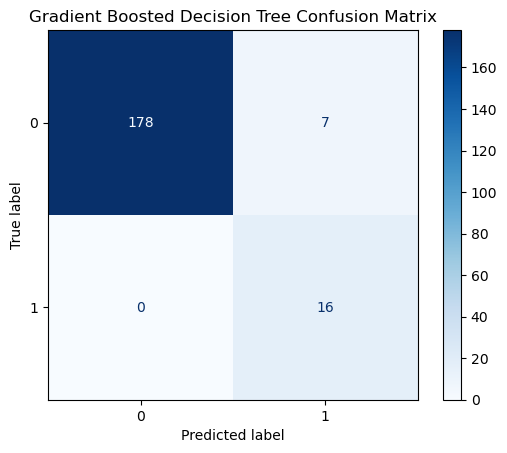

In [60]:
# Gradient Boosted Decision Trees

# Gradient Boosted Decision Tree model
gradient_boosted = GradientBoostingClassifier(random_state = 42, learning_rate = 0.01)
gradient_boosted.fit(X_train, y_train)

# Perform the prediction
y_pred_gradient_boosted = gradient_boosted.predict(X_test)

# Evaluate the model
print("Gradient Boosted Decision Tree Classification Report:")
print(classification_report(y_pred_gradient_boosted, y_test))
print(f"The accuracy score the model achieved is: " + str(round(accuracy_score(y_pred_gradient_boosted, y_test) * 100, 2)) + "%")

# Visualization with confusion matrix
cm_gradient_boosted = confusion_matrix(y_pred_gradient_boosted, y_test, labels = gradient_boosted.classes_)
disp_gradient_boosted = ConfusionMatrixDisplay(confusion_matrix = cm_gradient_boosted, display_labels = gradient_boosted.classes_)
disp_gradient_boosted.plot(cmap = plt.cm.Blues)
plt.title("Gradient Boosted Decision Tree Confusion Matrix")
plt.show()

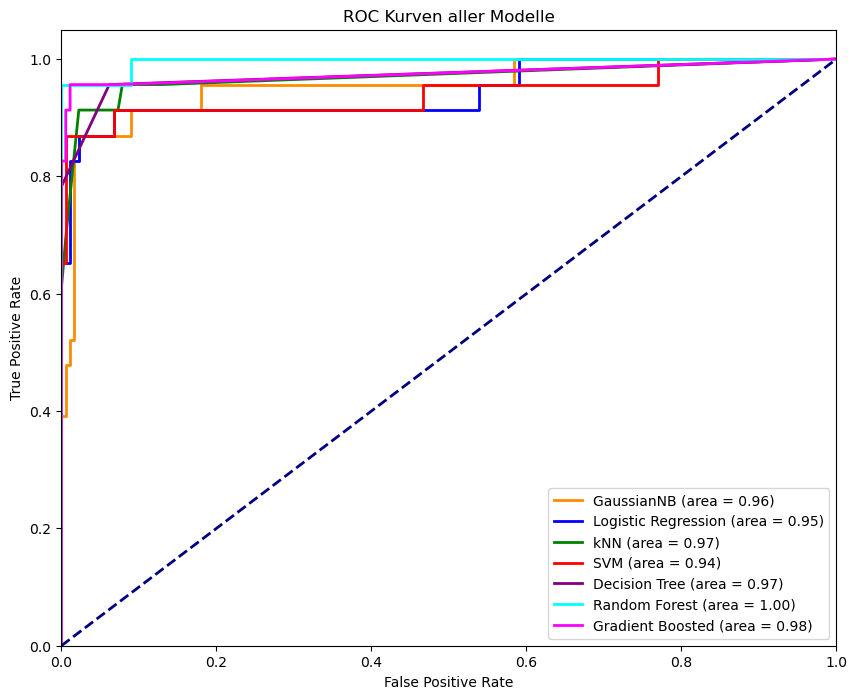

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Berechne die Wahrscheinlichkeitsvorhersagen
y_prob_Gnb = Gnb.predict_proba(X_test)[:, 1]
y_prob_log = log.predict_proba(X_test_scaled)[:, 1]
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
y_prob_svm = svm.decision_function(X_test_scaled)
y_prob_tree = tree.predict_proba(X_test)[:, 1]
y_prob_forest = rf.predict_proba(X_test)[:, 1]
y_prob_gradient_boosted = gradient_boosted.predict_proba(X_test)[:, 1]

# Berechne die ROC-Kurve und den AUC-Wert für jedes Modell
fpr_Gnb, tpr_Gnb, _ = roc_curve(y_test, y_prob_Gnb)
roc_auc_Gnb = auc(fpr_Gnb, tpr_Gnb)

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_forest, tpr_forest, _ = roc_curve(y_test, y_prob_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

fpr_gradient_boosted, tpr_gradient_boosted, _ = roc_curve(y_test, y_prob_gradient_boosted)
roc_auc_gradient_boosted = auc(fpr_gradient_boosted, tpr_gradient_boosted)

# Plot der ROC-Kurven
plt.figure(figsize=(10, 8))
plt.plot(fpr_Gnb, tpr_Gnb, color='darkorange', lw=2, label='GaussianNB (area = %0.2f)' % roc_auc_Gnb)
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_log)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='kNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_tree, tpr_tree, color='purple', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_tree)
plt.plot(fpr_forest, tpr_forest, color='cyan', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_forest)
plt.plot(fpr_gradient_boosted, tpr_gradient_boosted, color='magenta', lw=2, label='Gradient Boosted (area = %0.2f)' % roc_auc_gradient_boosted)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Kurven aller Modelle')
plt.legend(loc="lower right")
plt.show()

In [63]:
# Advanced features with One-Hot-Encoding

In [78]:
df_one_hot = pd.read_csv("pokemon_cleaned.csv")
df_one_hot.head().T

,0,1,2,3,4
name,Bulbasaur,Ivysaur,Venusaur,Charmander,Charmeleon
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']"
against_bug,1.0,1.0,1.0,0.5,0.5
against_dark,1.0,1.0,1.0,1.0,1.0
against_dragon,1.0,1.0,1.0,1.0,1.0
against_electric,0.5,0.5,0.5,1.0,1.0
against_fairy,0.5,0.5,0.5,0.5,0.5
against_fight,0.5,0.5,0.5,1.0,1.0
against_fire,2.0,2.0,2.0,0.5,0.5
against_flying,2.0,2.0,2.0,1.0,1.0


In [79]:
df_one_hot["type2"].fillna("None", inplace = True)
df_one_hot["percentage_male"].fillna("None", inplace = True)

C:\Users\seitz\AppData\Local\Temp\ipykernel_26992\3606315427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_one_hot["type2"].fillna("None", inplace = True)
C:\Users\seitz\AppData\Local\Temp\ipykernel_26992\3606315427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the features and the target
features = [
    "attack", "base_total", "capture_rate", "defense", "experience_growth", 
    "hp", "sp_attack", "sp_defense", "speed", "weight_kg", "generation", "type1", "type2"
]
target = "is_legendary"

# Extract features and target from the DataFrame
X = df_one_hot[features]
y = df_one_hot[target].values

# Define the ColumnTransformer to apply OneHotEncoder to 'type1' and 'type2' columns
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop="first"), ["type1", "type2"]),
        ("num", "passthrough", [
            "attack", "base_total", "capture_rate", "defense", "experience_growth", 
            "hp", "sp_attack", "sp_defense", "speed", "weight_kg", "generation"
        ])
    ]
)

# Apply the transformations
X_transformed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

# Scale the data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

0.3781094527363184
The accuracy score the model achieved is: 37.81 %
GaussianNB Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.95      0.47        59
           1       0.87      0.14      0.24       142

    accuracy                           0.38       201
   macro avg       0.59      0.54      0.36       201
weighted avg       0.71      0.38      0.31       201



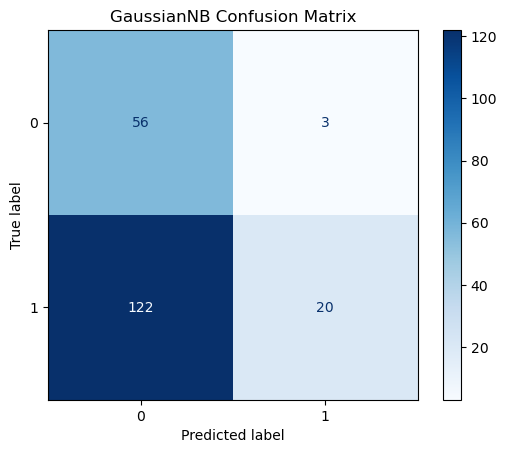

In [85]:
# Apply the transformations
X_transformed = preprocessor.fit_transform(X)

# Convert sparse matrix to dense
X_transformed = X_transformed.toarray()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize GaussianNB model and fit training data
Gnb = GaussianNB()
Gnb.fit(X_train_scaled, y_train)

# Predict the test data
y_pred_Gnb = Gnb.predict(X_test_scaled)

# Calculate accuracy
score_plain = accuracy_score(y_pred_Gnb, y_test)
score_Gnb = round(accuracy_score(y_pred_Gnb, y_test) * 100, 2)

# Print accuracy scores
print(score_plain)  # plain score
print("The accuracy score the model achieved is: " + str(score_Gnb) + " %")

# Evaluate the model
print("GaussianNB Classification Report:")
print(classification_report(y_pred_Gnb, y_test))

# Visualization with confusion matrix
cm_gnb = confusion_matrix(y_pred_Gnb, y_test, labels=Gnb.classes_)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=Gnb.classes_)
disp_gnb.plot(cmap=plt.cm.Blues)
plt.title("GaussianNB Confusion Matrix")
plt.show()

In [86]:
# TODO: prüfen, ob das stimmen kann...